In [2]:
!pip3 install gluoncv

     |████████████████████████████████| 1.1 MB 19.6 MB/s eta 0:00:01
     |████████████████████████████████| 334 kB 41.3 MB/s eta 0:00:01
     |████████████████████████████████| 120 kB 58.4 MB/s eta 0:00:01
     |████████████████████████████████| 14.1 MB 36.9 MB/s eta 0:00:01
     |████████████████████████████████| 14.8 MB 53.6 MB/s eta 0:00:01
     |████████████████████████████████| 27.4 MB 37.9 MB/s eta 0:00:01
     |████████████████████████████████| 950 kB 62.6 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done


  Created wheel for ConfigSpace: filename=ConfigSpace-0.4.18-cp37-cp37m-linux_x86_64.whl size=823489 sha256=05410b815b25c4d369654fdebca9609e099237350520034b7d9fbc76387defb1
  Stored in directory: /home/ec2-user/.cache/pip/wheels/36/f7/0f/36f368c419ea1a8024fc3d6c078c3111dfef43fa1d14cfebe0
  Created wheel for autograd: filename=autograd-1.3-py3-none-any.whl size=47989 sha256=74245c6f8e1e5164735b794d7bf1b20cfeaefc89aaa0a35994a823b9729dec03
  Stored in directory: /home/ec2-user/.cache/pip/wheels/ef/32/31/0e87227cd0ca1d99ad51fbe4b54c6fa02afccf7e483d045e04
Successfully built ConfigSpace autograd
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.1
    Uninstalling numpy-1.20.1:
      Successfully uninstalled numpy-1.20.1
  Attempting uninstall: scipy
    Found existing installation: scipy 1.5.3
    Uninstalling scipy-1.5.3:
      Successfully uninstalled scipy-1.5.3


In [2]:
import matplotlib.pyplot as plt

from mxnet import gluon, nd, image
from mxnet.gluon.data.vision import transforms
from gluoncv import utils
from gluoncv.model_zoo import get_model

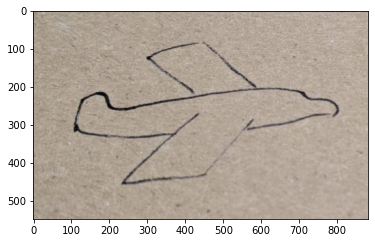

In [3]:
url = 'https://raw.githubusercontent.com/dmlc/web-data/master/gluoncv/classification/plane-draw.jpeg'
im_fname = utils.download(url)

img = image.imread(im_fname)

plt.imshow(img.asnumpy())
plt.show()

In [4]:
transform_fn = transforms.Compose([
    transforms.Resize(32),
    transforms.CenterCrop(32),
    transforms.ToTensor(),
    transforms.Normalize([0.4914, 0.4822, 0.4465], [0.2023, 0.1994, 0.2010])
])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


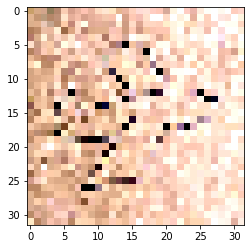

In [5]:
img = transform_fn(img)
plt.imshow(nd.transpose(img, (1,2,0)).asnumpy())
plt.show()

In [6]:
net = get_model('cifar_resnet110_v1', classes=10, pretrained=True)

6336KB [00:00, 12992.27KB/s]                          


In [7]:
pred = net(img.expand_dims(axis=0))

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
ind = nd.argmax(pred, axis=1).astype('int')
print('The input picture is classified as [%s], with probability %.3f.'%
      (class_names[ind.asscalar()], nd.softmax(pred)[0][ind].asscalar()))

The input picture is classified as [airplane], with probability 0.393.
